# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)


- balcony — число балконов


- ceiling_height — высота потолков (м)


- cityCenters_nearest — расстояние до центра города (м)


- days_exposition — сколько дней было размещено объявление (от публикации до снятия)


- first_day_exposition — дата публикации


- floor — этаж


- floors_total — всего этажей в доме


- is_apartment — апартаменты (булев тип)


- kitchen_area — площадь кухни в квадратных метрах (м²)


- last_price — цена на момент снятия с публикации


- living_area — жилая площадь в квадратных метрах (м²)


- locality_name — название населённого пункта


- open_plan — свободная планировка (булев тип)


- parks_around3000 — число парков в радиусе 3 км


- parks_nearest — расстояние до ближайшего парка (м)


- ponds_around3000 — число водоёмов в радиусе 3 км


- ponds_nearest — расстояние до ближайшего водоёма (м)


- rooms — число комнат


- studio — квартира-студия (булев тип)


- total_area — общая площадь квартиры в квадратных метрах (м²)


- total_images — число фотографий квартиры в объявлении

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Ознакомился с таблицей

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Увидел каккие типы данных в датасете

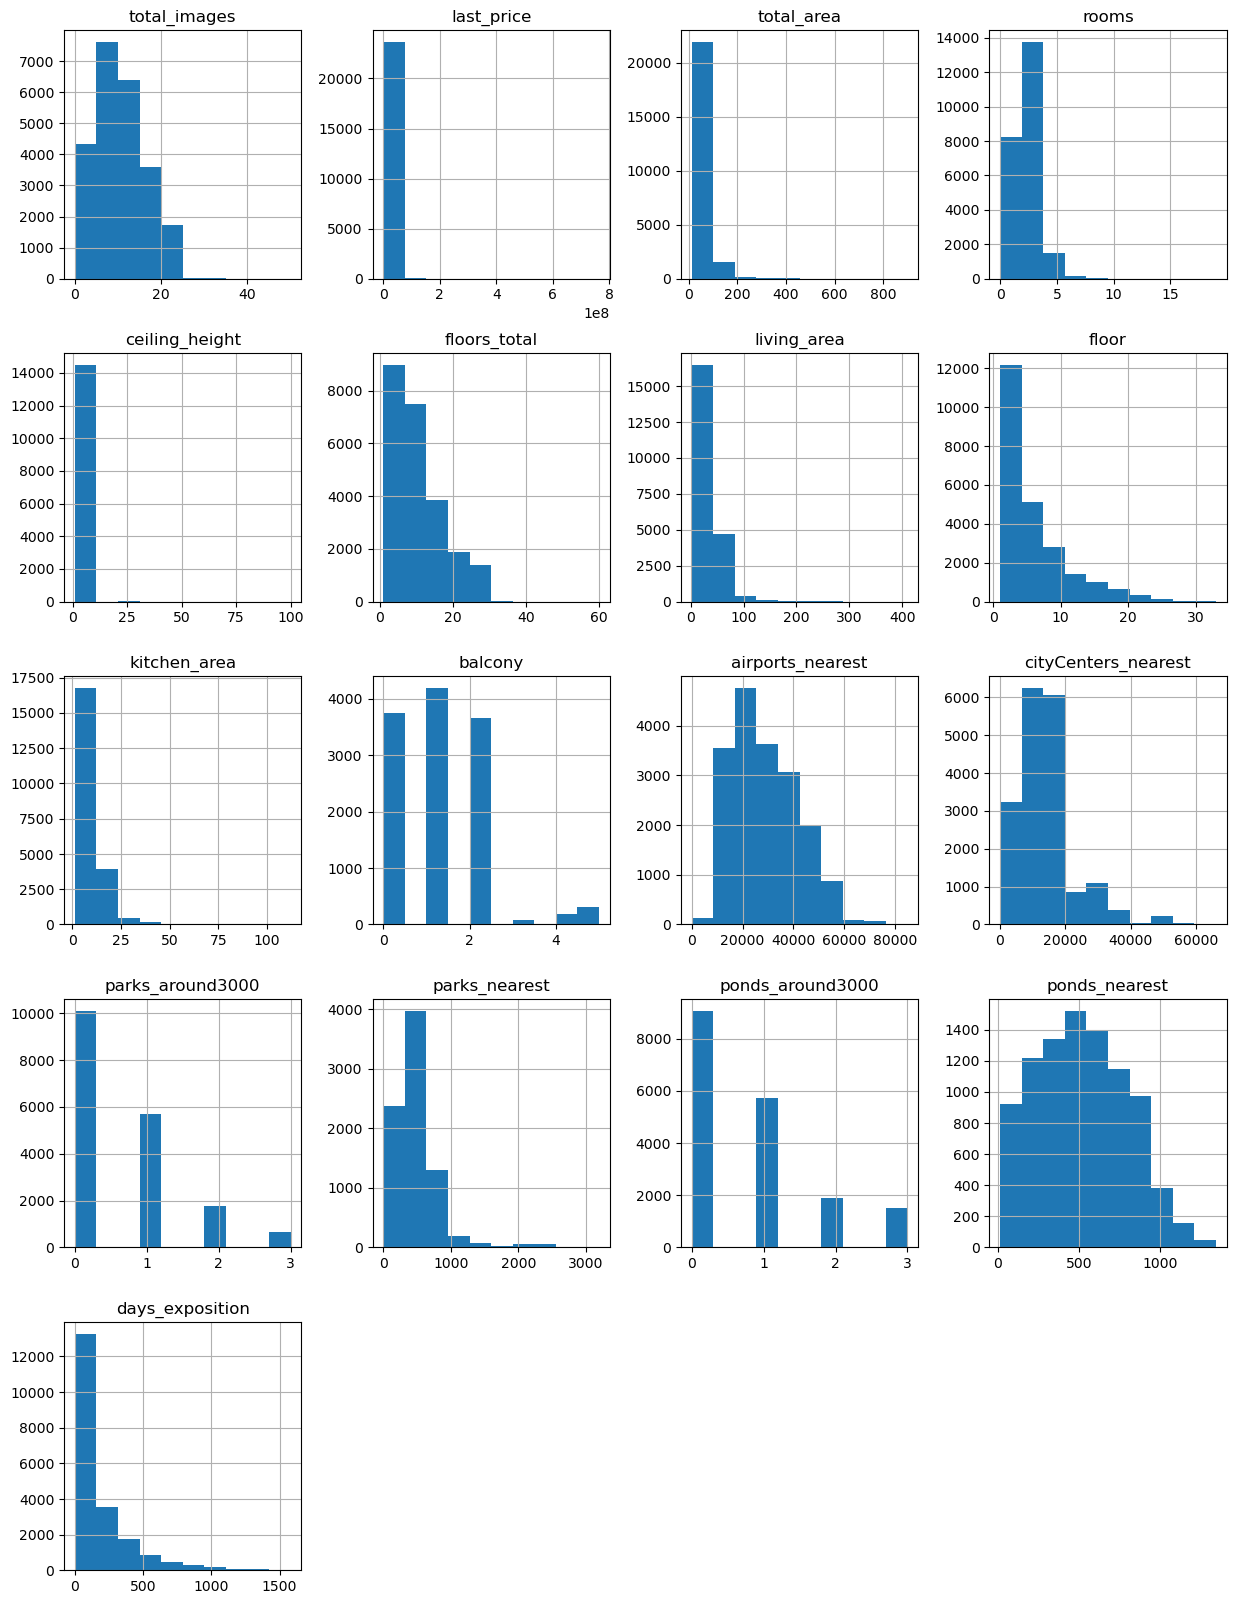

In [3]:
import matplotlib.pyplot as plt

data.hist(figsize=(15, 20));

## Предобработка данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Узнал сколько есть пропусков в каждом столбце.

Пропуски в данных могут быть из-за человечесокго фактора.Также пропуски могут быть из-за технических ошибок сайта. Какие-та данные не прогрузились в базу данных.

Пропуски в is_apartment можно заполнить как False(не апартаменты). 

В столбце locality_name логичную замену предложить невозможно, тоже не заполняем пропуски. 

В столбце balcony пропущенные значения нужно заменить на 0, так как, если при заполнении не указали число балконов, значит их вообще нет в квартире. 

airports_nearest не заполняем, так как аэропортов рядом нет. 

parks_around3000 и parks_nearest не заполняем, так как парков нет рядом. 

ponds_around3000 и ponds_nearest не заполняем, так как прудов нет рядом.

Пропуски в остальных столбцах можно заполнить медианным значением(ceiling_height, floors_total, living_area, kitchen_area, cityCenters_nearest, days_exposition). 

In [5]:
data['is_apartment'] = data['is_apartment'].fillna('False')

Заполнил пропуски в столбце is_apartment

In [6]:
data['balcony'] = data['balcony'].fillna(0)

Заполнил пропуски в столбце balcony

In [7]:
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

floors_total_median = data['floors_total'].median()
data['floors_total'] = data['floors_total'].fillna(floors_total_median)

living_area_median = data['living_area'].median()
data['living_area'] = data['living_area'].fillna(living_area_median)

kitchen_area_median = data['kitchen_area'].median()
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_median)

cityCenters_nearest_median = data['cityCenters_nearest'].median()
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(cityCenters_nearest_median)

Заполнил в остальных столбцах пропуски медианным значением

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest         0
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Изменил тип данных в следующих столбцах:

In [9]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data['balcony'] = data['balcony'].astype('int64')

data['floors_total'] = data['floors_total'].astype('int64')

data['days_exposition'] = data['days_exposition'].astype('Int64', errors='ignore')
    
data['ponds_around3000'] = data['ponds_around3000'].astype('Int64', errors='ignore')
    
data['parks_around3000'] = data['parks_around3000'].astype('Int64', errors='ignore')

In [10]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [11]:
data['locality_name'].nunique()

364

In [12]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')




In [13]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

In [14]:
data['locality_name'].nunique()

321

Обработал неявные дубликаты. Теперь уникльных значений в столбце locality_name: 321

In [15]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,23699.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.667750,34.099892,5.892358,10.428526,0.591080,28793.672193,13936.792797,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.585961,21.162096,4.885249,5.631126,0.959298,12630.880622,7553.779633,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.400000,0.000000,18585.000000,10927.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,41.100000,8.000000,11.440000,1.000000,37273.000000,15248.500000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Удалим квартиры дешевле 300к

Удалим квартиры дороже 150кк

Удалим квартиры общей площадью больше 500 м/2

Удалим квартиры с кол-во комнат больше 10

Удалим квартиры с высотой потолков от 4 до 20м. 

Квартиры с высотой потолков от 20 до 40 поделим на 10(так как ошибка при занесении информации в базу). 

Квартиры с высотой потолков от 41(Явный выброс)

In [16]:
data.drop(index=data.query('last_price < 3e+5').index,inplace=True)
data.drop(index=data.query('last_price > 1.5e+8').index,inplace=True)
data.drop(index=data.query('total_area > 300').index,inplace=True)
data.drop(index=data.query('rooms > 7').index,inplace=True)
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 20').index,inplace=True)
data.update(data[(data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 40)]['ceiling_height']/10)
data.drop(index=data.query('ceiling_height >= 41').index,inplace=True)

In [17]:
data.duplicated().sum()

0

**Вывод: нашёл и заполнил пропуски, где это возможно. Изменил тип данных в столбцах: first_day_exposition, balcony, floors_total, days_exposition, ponds_around3000, parks_around3000. Устранил неявные дубликаты, явных дубликатов в данных не было. Исбавился от редких и аномальных значений. Теперь анализ данных будет точней.**

## Добавим в таблицу новые столбцы

In [18]:
data['price_for_1meter'] = data['last_price']/data['total_area']
data['publication_weekday'] = data['first_day_exposition'].dt.weekday
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_year'] = data['first_day_exposition'].dt.year

Добавил столбцы: 

price_for_1meter(цена за 1 метр)

publication_weekday(день недели публикации)

publication_month(месяц публикации)

publication_year(год публикации)

In [19]:
def floor_type(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

Добавил столбец floor_type(тип этажа)

In [20]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()

Добавил столбец cityCenters_nearest_km(расстояние до центра в км) и округлил до целых значений.

In [21]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_1meter,publication_weekday,publication_month,publication_year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0


## Проведём исследовательский анализ данных

### Изучил следующие параметры объектов

count    23563.000000
mean        59.160065
std         29.746372
min         12.000000
25%         40.000000
50%         52.000000
75%         69.100000
max        300.000000
Name: total_area, dtype: float64

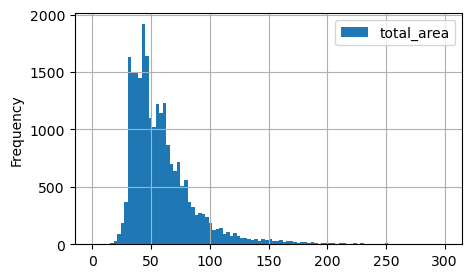

In [22]:
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 300))
data['total_area'].describe()

Мы видим, что большинство квартир имеет площадь 40-50м/2. Квартир с площадью больше 150м/2 самое маленькое количество.

count    23563.000000
mean        33.529179
std         18.515163
min          2.000000
25%         19.000000
50%         30.000000
75%         41.000000
max        250.000000
Name: living_area, dtype: float64

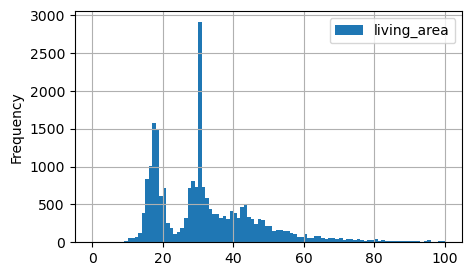

In [23]:
data.plot(y='living_area', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 100))
data['living_area'].describe()

Больше всего квартир с жилой площадью 30м/2 и 15м/2. Квартир с жилой площадью больше 100м/2 меньше всего.

count    23563.000000
mean        10.349169
std          5.373961
min          1.300000
25%          7.300000
50%          9.100000
75%         11.400000
max        107.000000
Name: kitchen_area, dtype: float64

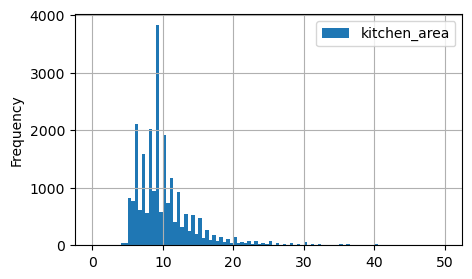

In [24]:
data.plot(y='kitchen_area', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 50))
data['kitchen_area'].describe()

Больше всего квартир с кухней площадью 5-15м/2. Очень мало квартир с площадью кухни больше 20м/2

count    2.356300e+04
mean     6.192931e+06
std      6.523642e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      1.480000e+08
Name: last_price, dtype: float64

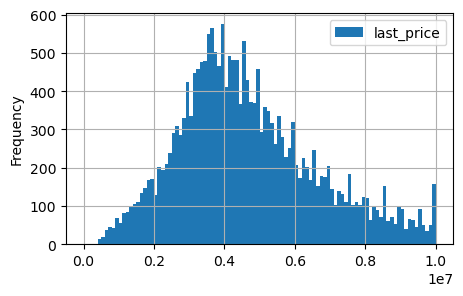

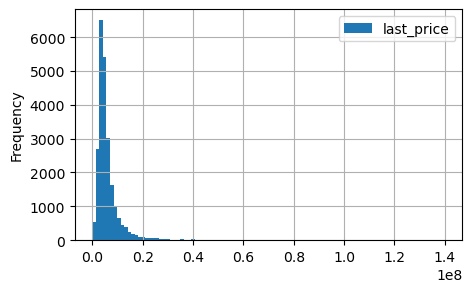

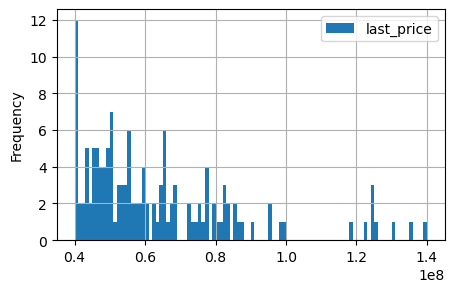

In [25]:
data.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 10000000))
data.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 1.4e+8))
data.plot(y='last_price', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(4.0e+7, 1.4e+8))
data['last_price'].describe()

Ценовой диапазон квартир в основном от 2 миллионов рублей до 10 миллионов. Есть также квартиры дороже 40 миллионов, но их очень мало, единицы.

count    23563.000000
mean         2.051139
std          1.019781
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

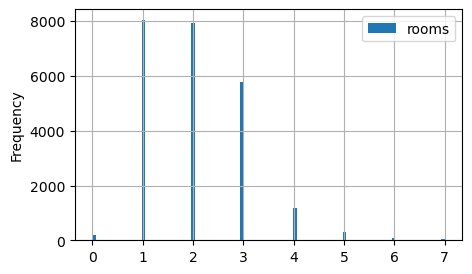

In [26]:
data.plot(y='rooms', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 7))
data['rooms'].describe()

Квартир с 1 или 2 комнатами примерно одинаковое количество, приблизетольно по 8к квартир. Квартир с 3 комнатами меньше, около 6к. Квартир с 4 комнатами примерно 1500. И квартир с 5 и больше комнатами совсем чуть чуть.  

count    23563.000000
mean         2.691742
std          0.202856
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

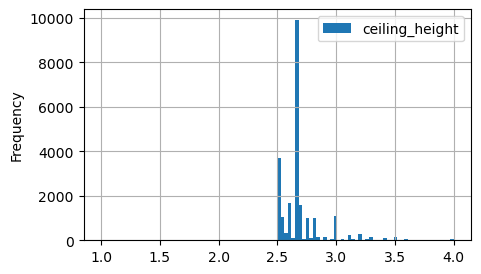

In [27]:
data.plot(y='ceiling_height', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(1, 4))
data['ceiling_height'].describe()

В основном квартиры имеют высоту потолков 2.7-2.8м/2. Почти в 2.5 раза меньше квартир с потолками 2.5м/2. Квартир с потолками выше 3м/2 самое малое количество.

count    23563.000000
mean         5.897636
std          4.888143
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

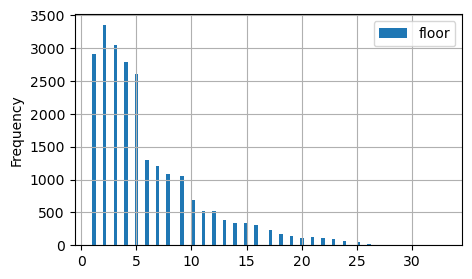

In [28]:
data.plot(y='floor', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(1, 33))
data['floor'].describe()

In [29]:
data['floor_type'].value_counts()

другой       17370
последний     3288
первый        2905
Name: floor_type, dtype: int64

<AxesSubplot:>

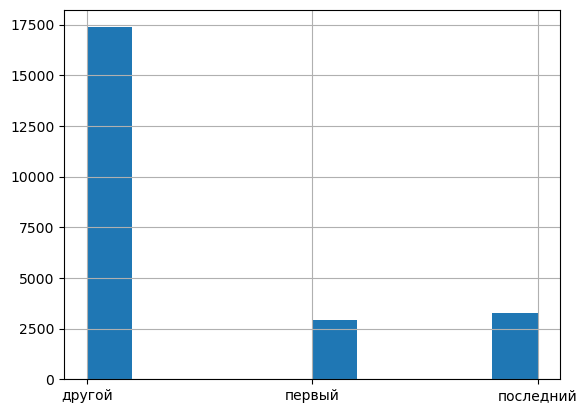

In [30]:
data['floor_type'].hist()

Больше всего квартир располагаются с 1 по 5 этаж. Почти в 2 раза меньше квартир, которые находятся с 6 по 10 этаж. И меньше всего квартир находятся выше 10 этажа.

Также в основном квартиры расположены не на первых и не на последних этажах домов. 

count    23563.000000
mean        10.692144
std          6.589214
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

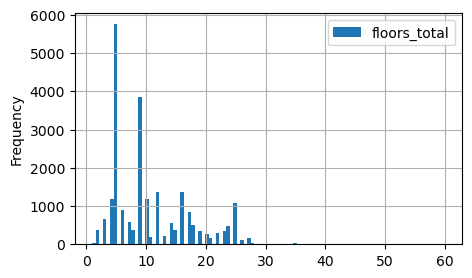

In [31]:
data.plot(y='floors_total', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(1, 60))
data['floors_total'].describe()

Большинство пятиэтажек, десятиэтажек уже меньше. Домов с этажами больше 10 меньше всего.

count    23563.000000
mean     13975.621356
std       7542.076472
min        181.000000
25%      10987.000000
50%      13098.500000
75%      15266.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

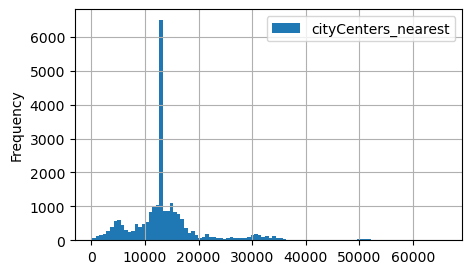

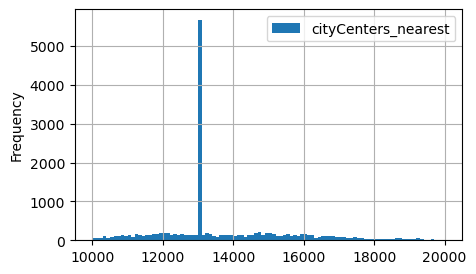

In [32]:
data.plot(y='cityCenters_nearest', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(181,  65968))
data.plot(y='cityCenters_nearest', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(10000,  20000))
data['cityCenters_nearest'].describe()

Больше всего квартир располагаются в 13км от центра города. Есть небольшие взлёты, которые показывают, что также большое количество квартир в радиусе 2-3 км и 12-16 км от центра города.

count    18031.000000
mean     28812.877101
std      12657.016669
min          0.000000
25%      18551.000000
50%      26770.000000
75%      37313.000000
max      84869.000000
Name: airports_nearest, dtype: float64

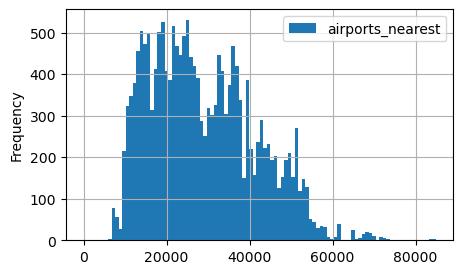

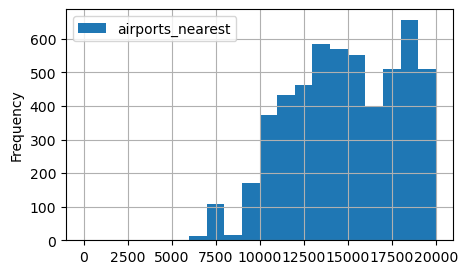

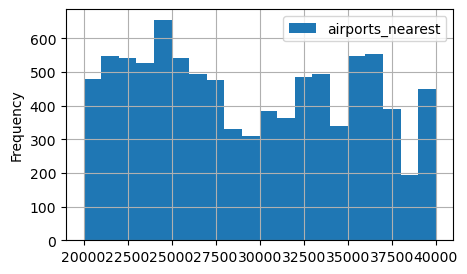

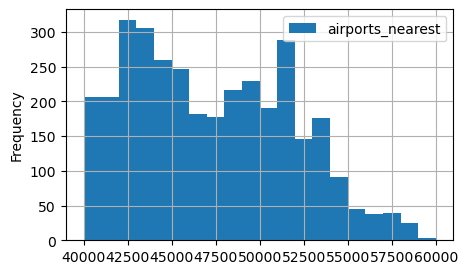

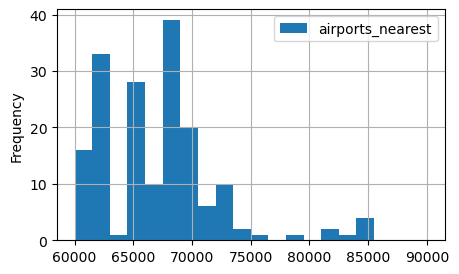

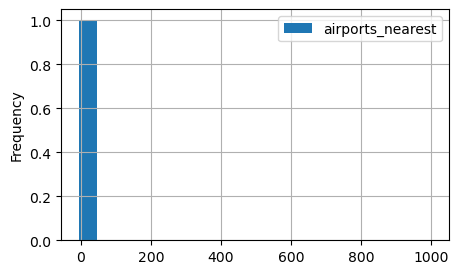

In [33]:
data.plot(y='airports_nearest', kind='hist', bins=100, grid=True, figsize=(5, 3), range=(0, 84869))
data.plot(y='airports_nearest', kind='hist', bins=20, grid=True, figsize=(5, 3), range=(0, 20000))
data.plot(y='airports_nearest', kind='hist', bins=20, grid=True, figsize=(5, 3), range=(20000, 40000))
data.plot(y='airports_nearest', kind='hist', bins=20, grid=True, figsize=(5, 3), range=(40000, 60000))
data.plot(y='airports_nearest', kind='hist', bins=20, grid=True, figsize=(5, 3), range=(60000, 90000))
data.plot(y='airports_nearest', kind='hist', bins=20, grid=True, figsize=(5, 3), range=(-5, 1000))


data['airports_nearest'].describe()

В основном квартиры располгаются от 10 до 50 км от аэропорта. Очень мало квартир располагается на расстояние больше 60 км от аэропорта. И есть 1 квартира, которая находится в 0 км от аэропорта, возможно служебная квартира для работников аэропорта.

count    7989.000000
mean      491.172112
std       342.984299
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

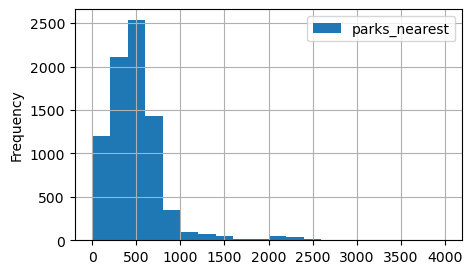

In [34]:
data.plot(y='parks_nearest', kind='hist', bins=20, grid=True, figsize=(5, 3), range=(0, 4000))
data['parks_nearest'].describe()

Больше всего квартир на расстоянии до 750м до парка.

count    23563.000000
mean         2.569155
std          1.789491
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: publication_weekday, dtype: float64

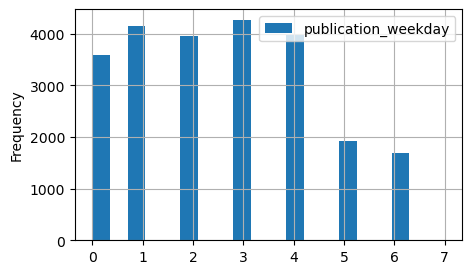

In [35]:
data.plot(y='publication_weekday', kind='hist', bins=20, grid=True, figsize=(5, 3), range=(0, 7))
data['publication_weekday'].describe()

В основном квартиры публиковались с понедельника по пятницу. По выходным в количестве публикаций обычно спад в 2 раза по сравнению с будними днями.

count    23563.000000
mean         6.400204
std          3.491876
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: publication_month, dtype: float64

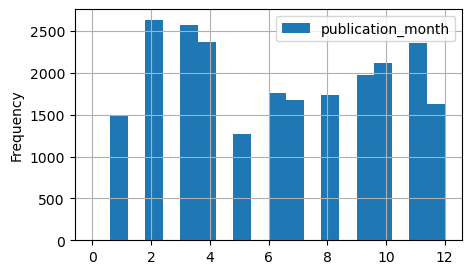

In [36]:
data.plot(y='publication_month', kind='hist', bins=20, grid=True, figsize=(5, 3), range=(0, 12))
data['publication_month'].describe()

Повышенная активность публикаций обычно с февраля по апрель, в мае значительный спад, приблизительно на 40%. Далее активность растёт с июня и до ноября, в январе опять спад.

### Изучим, как быстро продавались квартиры

count    20408.000000
mean       180.222609
std        218.967134
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

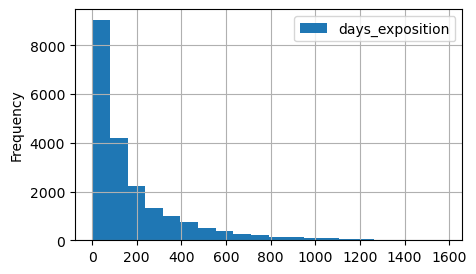

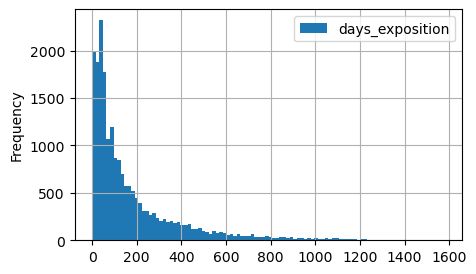

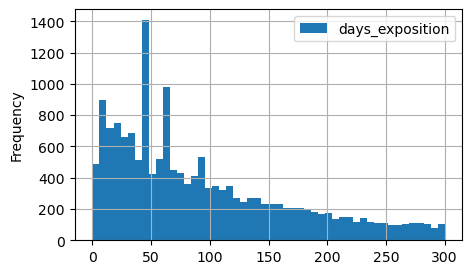

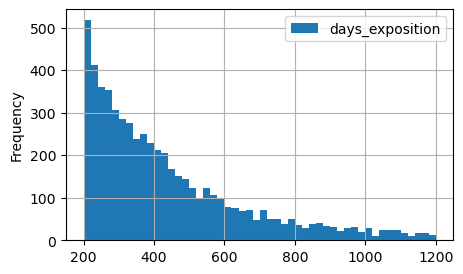

In [37]:
data.plot(y='days_exposition', kind='hist', bins=20, grid=True, figsize=(5, 3))
data.plot(y='days_exposition', kind='hist', bins=100, grid=True, figsize=(5, 3))
data.plot(y='days_exposition', kind='hist', bins=50, grid=True, figsize=(5, 3), range=(0, 300))
data.plot(y='days_exposition', kind='hist', bins=50, grid=True, figsize=(5, 3), range=(200, 1200))

data['days_exposition'].describe()

In [38]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

180.22260878087025
95.0


Обычно продажа квартир занимает от недели до 7 месяцев. Реже квартиры продаются больше года. Самые частые продажи приходятся на 3 месяц. Очень редко квартиры продаются больше двух лет. Быстрыми продажами можно считать до 45 дней. Необычно долгие продажи это от 200 дней и больше.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта

0.7316055548935508


<AxesSubplot:xlabel='last_price', ylabel='total_area'>

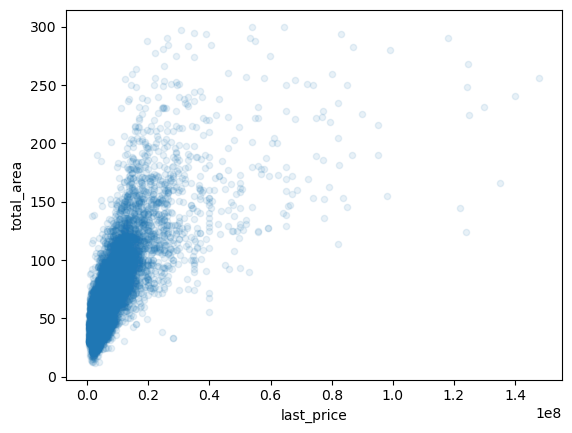

In [39]:
print(data['last_price'].corr(data['total_area']))
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)

0.5977984775197677


<AxesSubplot:xlabel='last_price', ylabel='living_area'>

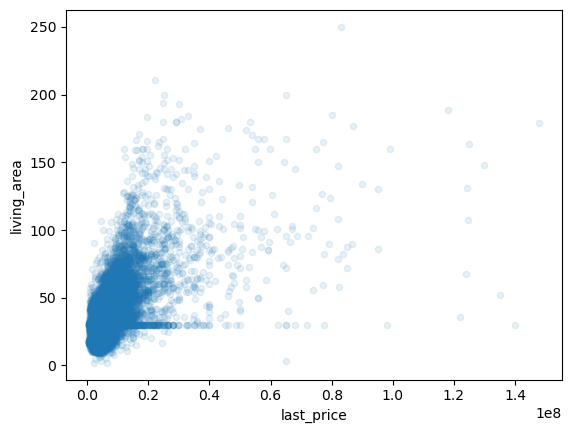

In [40]:
print(data['last_price'].corr(data['living_area']))
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1)

0.5342278741727928


<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

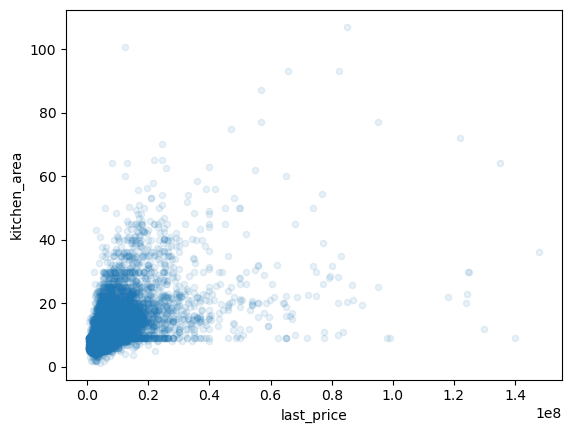

In [41]:
print(data['last_price'].corr(data['kitchen_area']))
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1)

0.43554406465157514


<AxesSubplot:xlabel='floor_type'>

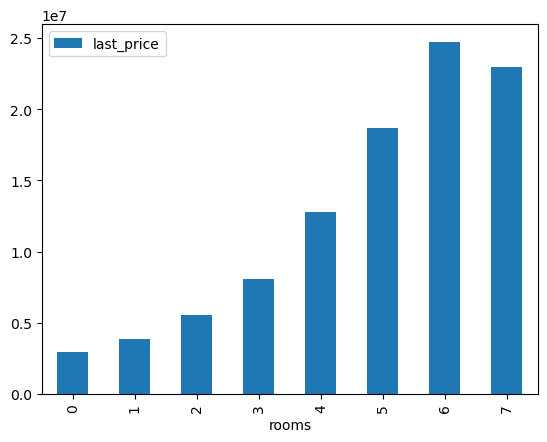

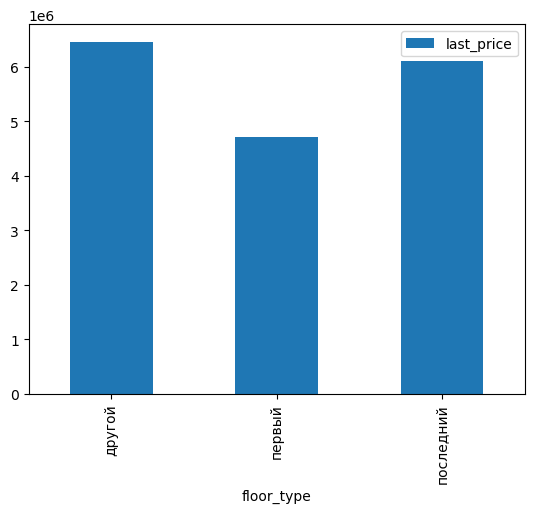

In [42]:
print(data['last_price'].corr(data['rooms']))
data.pivot_table(index='rooms',values='last_price').plot(y='last_price', kind='bar')
data.pivot_table(index='floor_type',values='last_price').plot(y='last_price', kind='bar')

-0.003370749352935307


<AxesSubplot:xlabel='publication_weekday'>

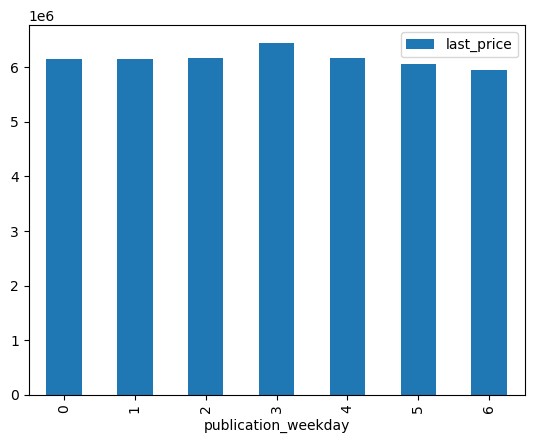

In [43]:
print(data['last_price'].corr(data['publication_weekday']))
data.pivot_table(index='publication_weekday',values='last_price').plot(y='last_price', kind='bar')

0.0049347353910888575


<AxesSubplot:xlabel='publication_month'>

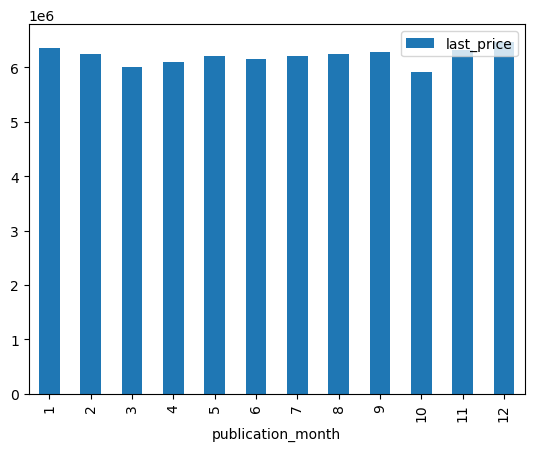

In [44]:
print(data['last_price'].corr(data['publication_month']))
data.pivot_table(index='publication_month',values='last_price').plot(y='last_price', kind='bar')

-0.05525719551413906


<AxesSubplot:xlabel='publication_year'>

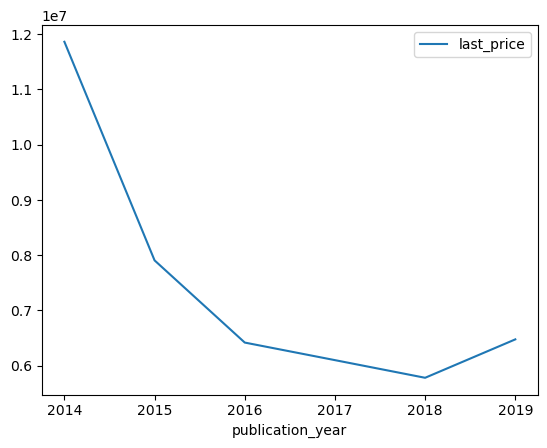

In [45]:
print(data['last_price'].corr(data['publication_year']))
data.pivot_table(index='publication_year',values='last_price').plot(y='last_price', kind='line')

<AxesSubplot:xlabel='publication_year'>

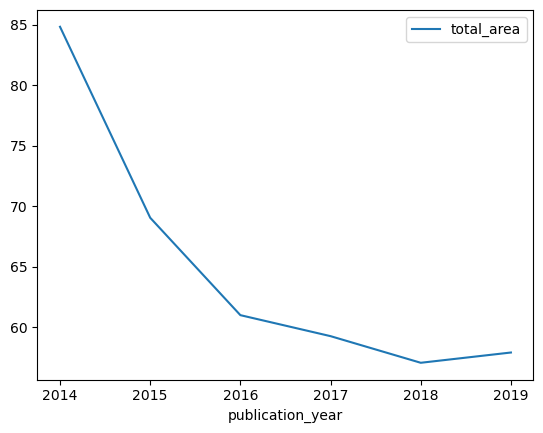

In [46]:
data.pivot_table(index='publication_year',values='total_area').plot(y='total_area', kind='line')

Корреляция между ценой квартиры и общей площадью: 0.73

Корреляция между ценой квартиры и жилой площадью: 0.59

Корреляция между ценой квартиры и площадью кухни: 0.53

Корреляция между ценой квартиры и количеством комнат: 0.43

Корреляция между ценой квартиры и днём недели публикации: -0.003

Корреляция между ценой квартиры и месяцем публикации: 0.004

Корреляция между ценой квартиры и годом публикации: -0.05

Цена квартиры зависит от: общей площади, жилой площади, площадью кухни, количеством комнат(чем больше комнат, тем дороже квартира). Также квартиры на первом этаже обычно дешевле, примерно 10-15%.

Цена квартиры не зависит от: дня, месяца и года публикации.

### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [47]:
data['locality_name'].value_counts().head(10)

санкт-петербург      15596
поселок мурино         556
поселок шушары         440
всеволожск             397
пушкин                 366
колпино                337
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 236
Name: locality_name, dtype: int64

In [48]:
re = data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'})
re.sort_values('balcony', ascending=False).head(10)

,balcony,last_price
locality_name,,
санкт-петербург,15596,5500000.0
поселок мурино,556,3400000.0
поселок шушары,440,3950000.0
всеволожск,397,3450000.0
пушкин,366,5150000.0
колпино,337,3600000.0
поселок парголово,327,4100000.0
гатчина,307,3100000.0
деревня кудрово,299,3790000.0


Самая высокая стоимость квадратного метра в Санкт-петербурге, средняя стоимость квартиры: 5500000 рублей.

Самая низкая стоимость квадратного метра в Выборге, средняя стоимость квартиры, 2873500 рублей.

### Как стоимость объектов зависит от расстояния до центра города


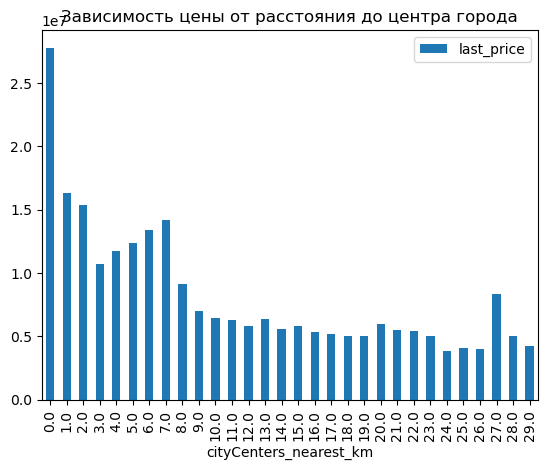

In [49]:
(data[data['locality_name']=='санкт-петербург'].pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean')
.plot(kind='bar', title = 'Зависимость цены от расстояния до центра города'));

Самая дорогая недвижимость нахожится до 1 км до центра. Дешевле квартиры на расстоянии от 1 до 7 км от центра. Квартиры, которые находятся от центра более 8 км, самые дешёвые.

## Общий вывод

После анализа данных сервиса "Яндекс Недвижимость" о продаже квартир в Санкт-Петербурге и соседних населённых пунктах можно сказать, что ценовой диапозон квартир в основном от 2 миллионов рублей и до 10 миллионов. Но есть также и элитная недвижимость, квартиры могут стоить больше 40 миллионов.

Самая высокая стоимость квадратного метра в Санкт-петербурге, средняя стоимость квартиры: 5500000 рублей.

Самая низкая стоимость квадратного метра в Выборге, средняя стоимость квартиры, 2873500 рублей.

Самые дорогие квартиры находятся в радиусе 1 км. от центра Санкт-Петербурга. Чем дальше от центра, тем дешевле стоит квадратный метр.

Цена квартиры зависит от: общей площади, жилой площади, площадью кухни, количеством комнат.

Больше всего квартир располагаются от центра более чем 10 км, предположительно это спальные районы.

Обычно продажа квартир занимает от недели до 7 месяцев. Реже квартиры продаются больше года. Самые частые продажи приходятся на 3 месяц. Очень редко квартиры продаются больше двух лет.
